In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Customer Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [135]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [15]:
df.isnull().sum().sum()

0

In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [24]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [28]:
df.duplicated().sum()

0

In [225]:
#converting 0 and 1 values to yes/no to make it easier to understand

In [68]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"

df['HasCrCard'] = df['HasCrCard'].apply(conv)

In [72]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"

df['Exited'] = df['Exited'].apply(conv)

In [74]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"

df['Complain'] = df['Complain'].apply(conv)

In [66]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"

df['IsActiveMember'] = df['IsActiveMember'].apply(conv)

In [76]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,yes,yes,101348.88,yes,yes,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,no,yes,112542.58,no,yes,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,yes,no,113931.57,yes,yes,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,no,no,93826.63,no,no,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,yes,yes,79084.10,no,no,5,GOLD,425


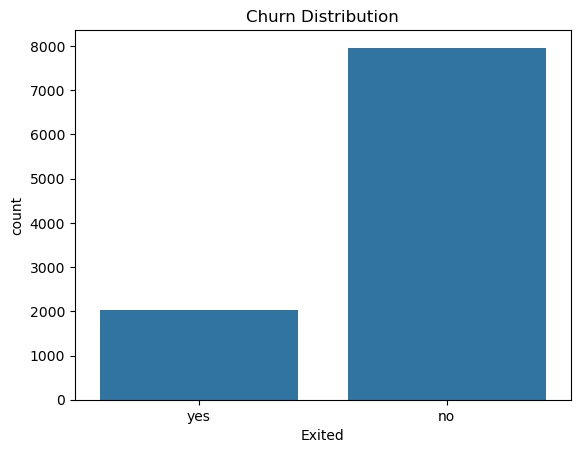

In [78]:
sns.countplot(x=df["Exited"])
plt.title("Churn Distribution")
plt.show()

In [148]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

In [150]:
df_cat.nunique()


Geography    3
Gender       2
Card Type    4
dtype: int64

Exploratory Data Analysis (EDA)

Univariate Analysis

<Figure size 1200x800 with 0 Axes>

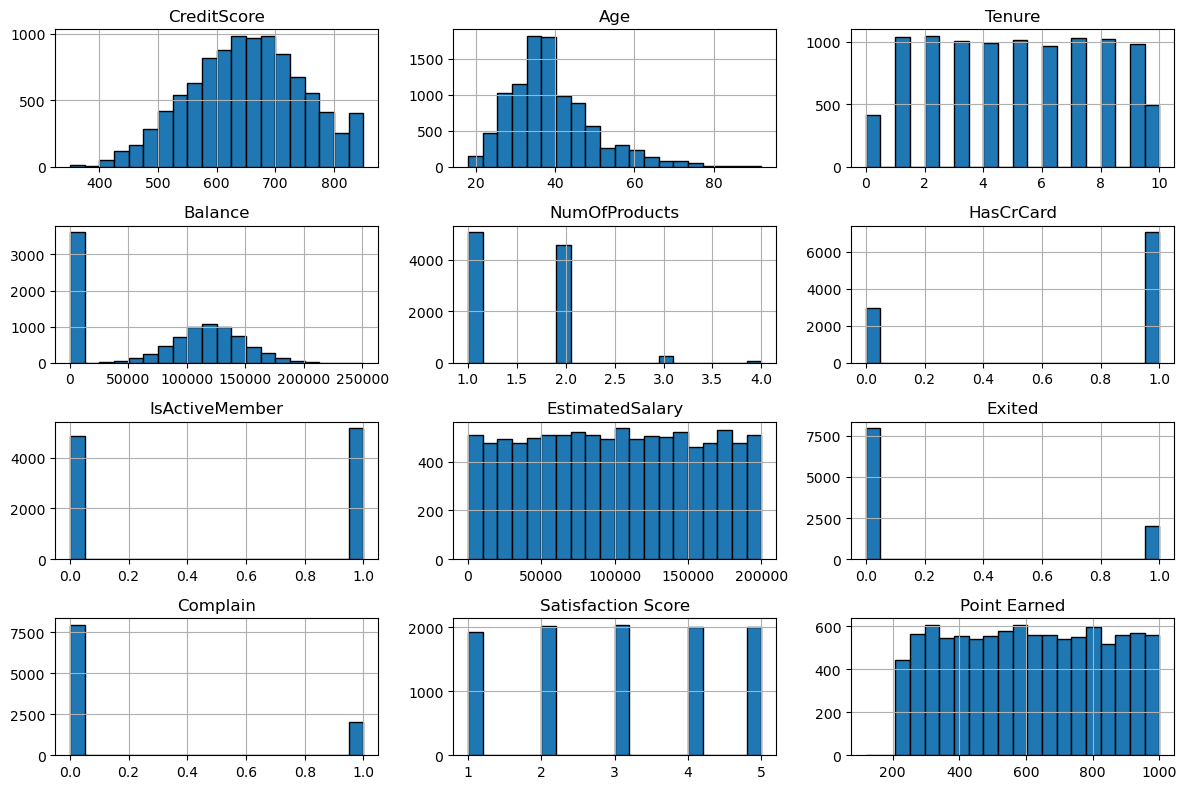

In [154]:
plt.figure(figsize=(12,8))
df_num.hist(figsize=(12,8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [160]:
def plots(data):
    for i in data.columns:
        plt.figure(figsize=(15,5))
        ax = sns.countplot(data=data,x=data[i],width=0.4)
        for label in ax.containers:
            ax.bar_label(label)
        plt.title(f"Distibution of {i}")
        plt.show()

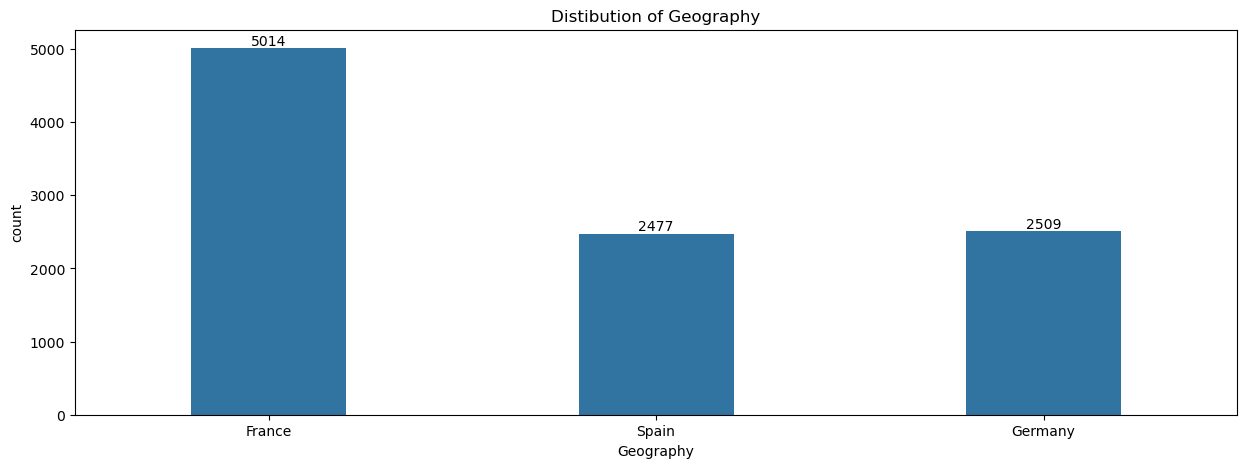

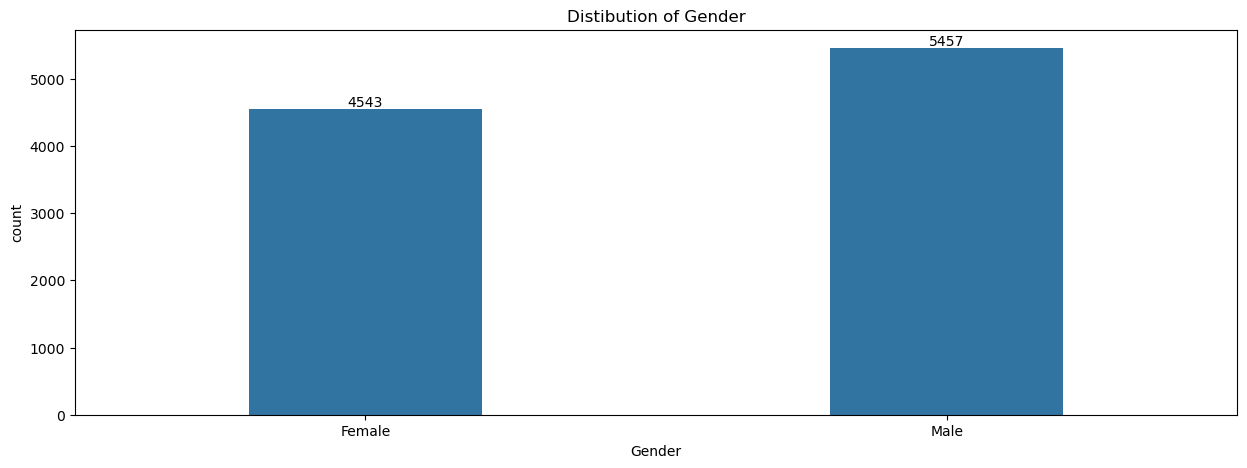

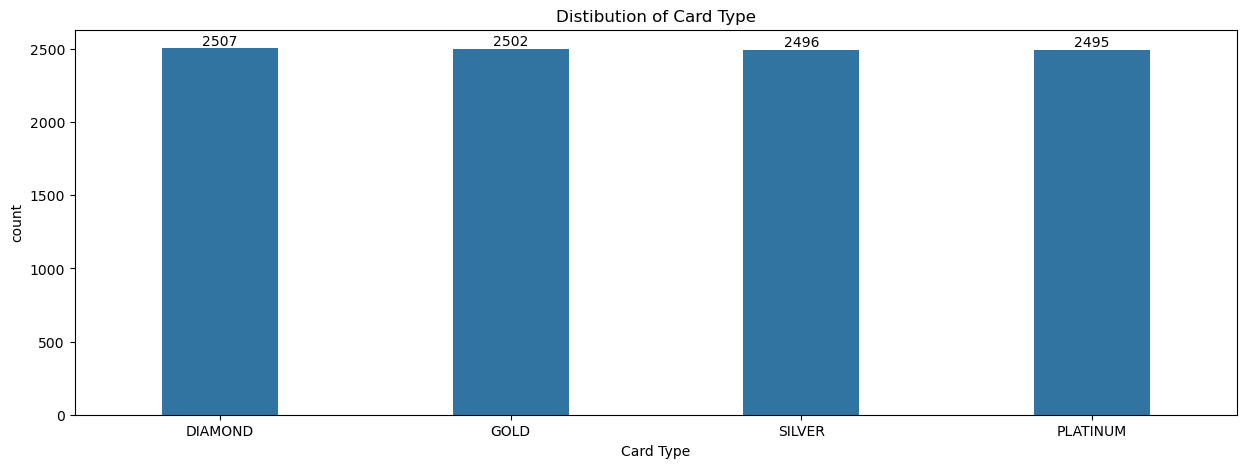

In [162]:
plots(df_cat)



1 . Distribution Showing bank majority of customer from France geography number of customers 5014 .                                         

2 . Gender Wise Male customer are more than Female customers.


3 . All four card types have similar customer counts.

BIVARIATE ANALYSIS

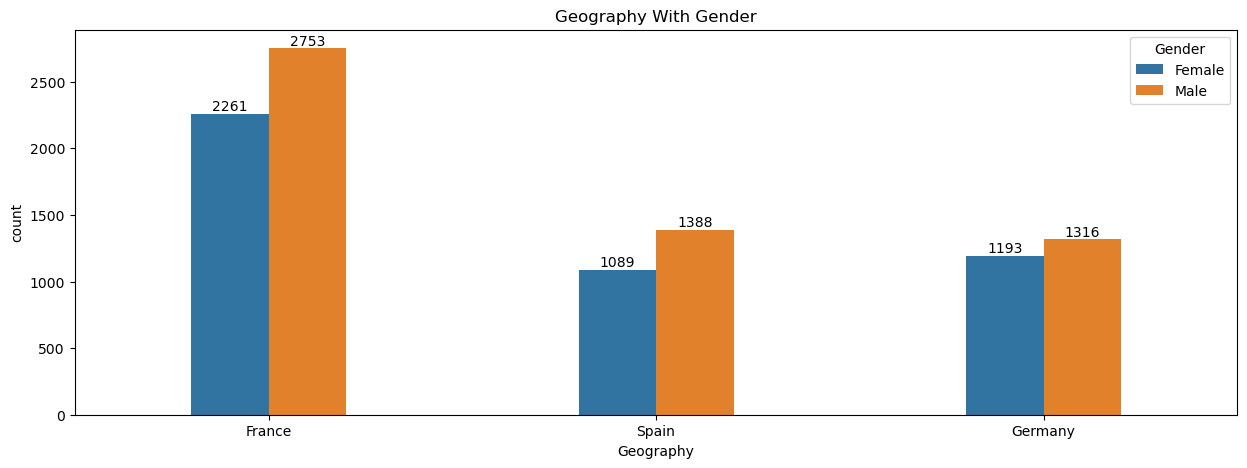

In [172]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df_cat,x=df_cat['Geography'],width=0.4,hue='Gender')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Geography With Gender")
plt.show()

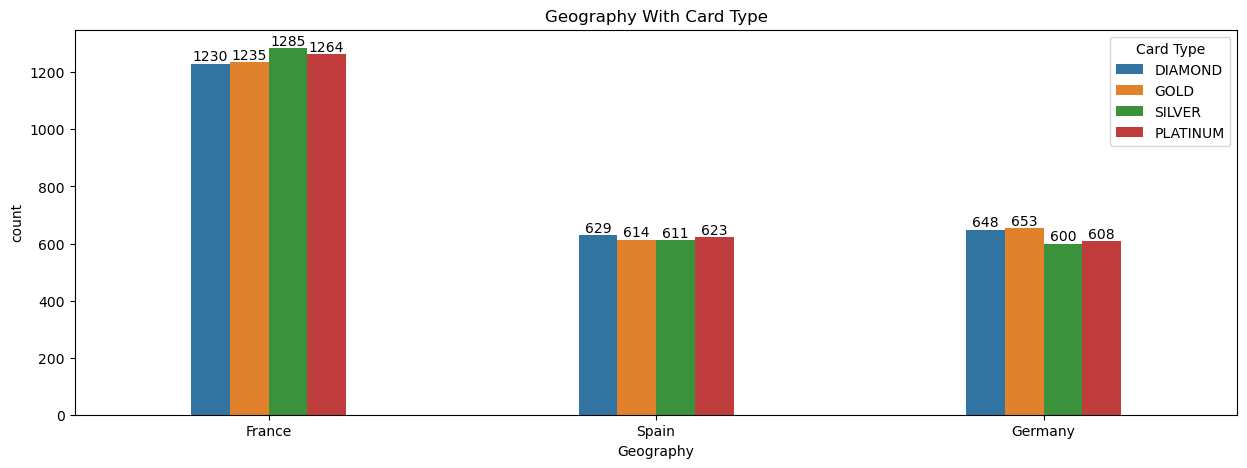

In [174]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df_cat,x=df_cat['Geography'],width=0.4,hue='Card Type')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Geography With Card Type")
plt.show()

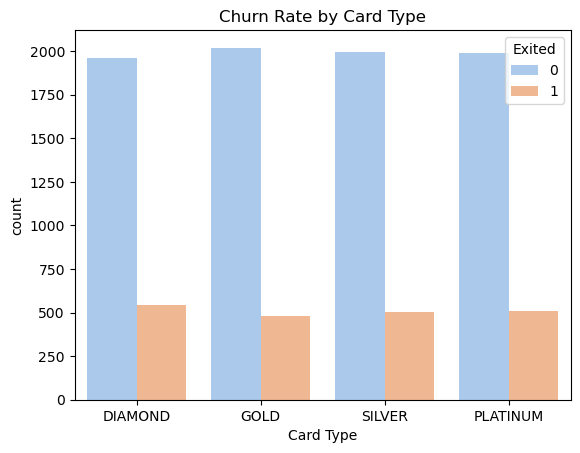

In [176]:
sns.countplot(data=df, x='Card Type', hue='Exited', palette='pastel')
plt.title("Churn Rate by Card Type")
plt.show()

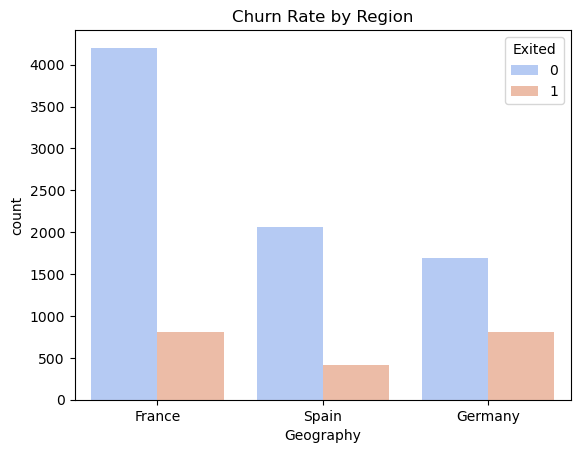

In [178]:
sns.countplot(data=df, x='Geography', hue='Exited', palette='coolwarm')
plt.title("Churn Rate by Region")
plt.show()

MULTIVARIATE ANALYSIS

<Figure size 1400x800 with 0 Axes>

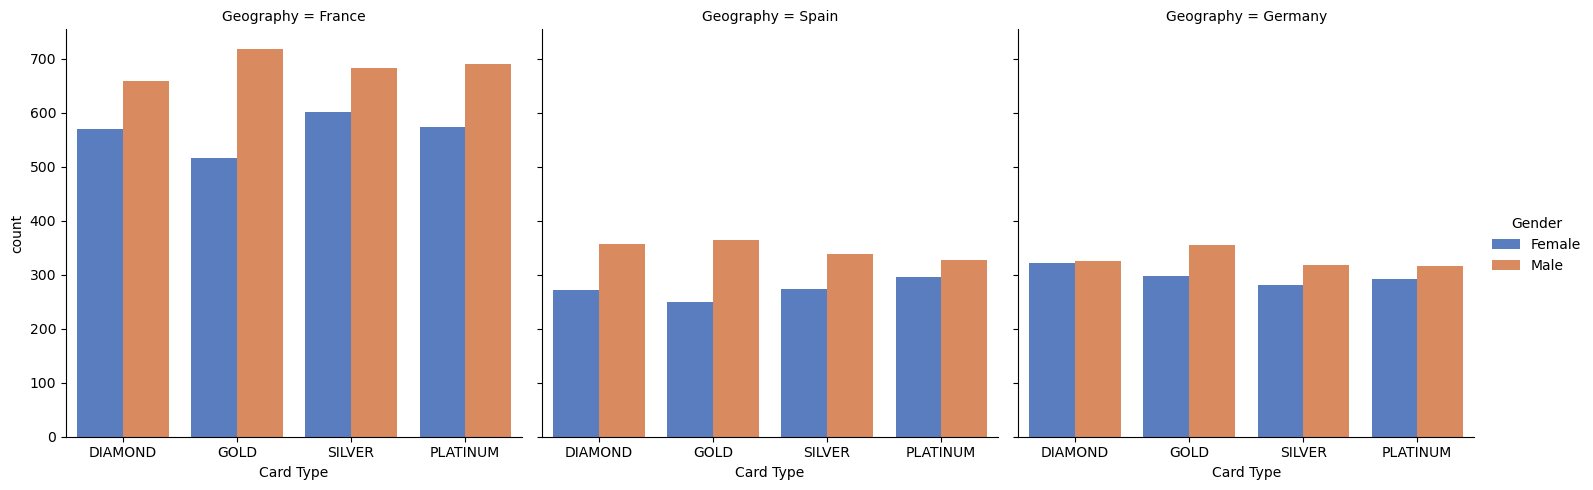

In [181]:
plt.figure(figsize=(14,8))
sns.catplot(data=df, x="Card Type", hue="Gender", col="Geography", kind="count", palette="muted")
plt.show()

In [183]:
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


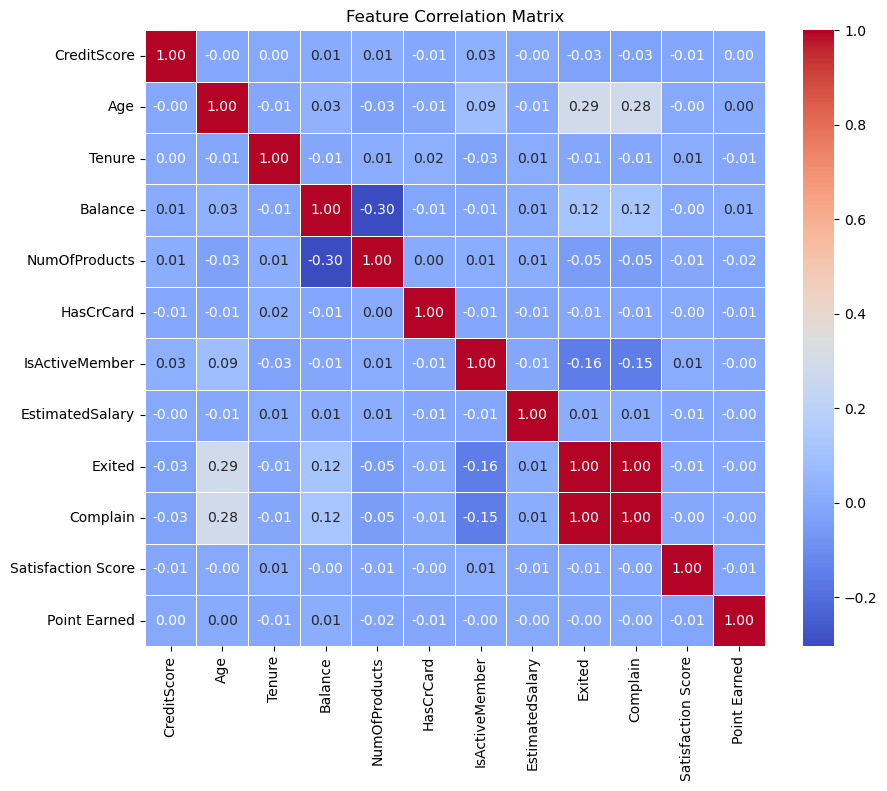

In [185]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [187]:
df_cat = pd.get_dummies(df_cat, columns=['Geography', 'Gender', 'Card Type'], drop_first=True,dtype='int')
df_cat.head()


,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,0,1,0,1,0,0


In [189]:
dfp = pd.concat([df_cat,df_num],axis=1)
dfp.head()

,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,0,0,0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,0,1,0,0,0,0,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,0,0,0,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,0,0,0,1,0,0,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,0,1,0,1,0,0,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


HANDLING IMBALANCE

In [192]:
X = dfp.drop(columns=["Exited"])
y = dfp["Exited"]
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

Exited
0    7962
1    3981
Name: count, dtype: int64


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9554, 17) (2389, 17) (9554,) (2389,)


In [196]:
columns = ['CreditScore' ,'Age' ,'Tenure' ,'Balance' ,'NumOfProducts' ,'EstimatedSalary' ,'Satisfaction Score' ,'Point Earned']

FEATURE SCALING (STANDARIZATION)

In [200]:
scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

TRAIN DECISION TREE MODEL

In [203]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

MODEL EVALUATION

Accuracy: 0.9983
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       782

    accuracy                           1.00      2389
   macro avg       1.00      1.00      1.00      2389
weighted avg       1.00      1.00      1.00      2389



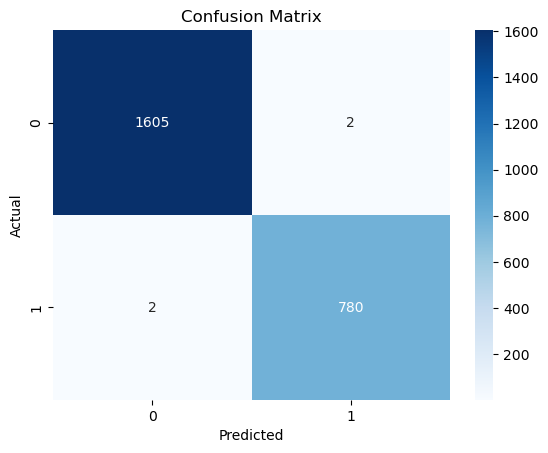

ROC-AUC Score: 0.9986


In [206]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

FEATURE IMPORTANCE ANALYSIS

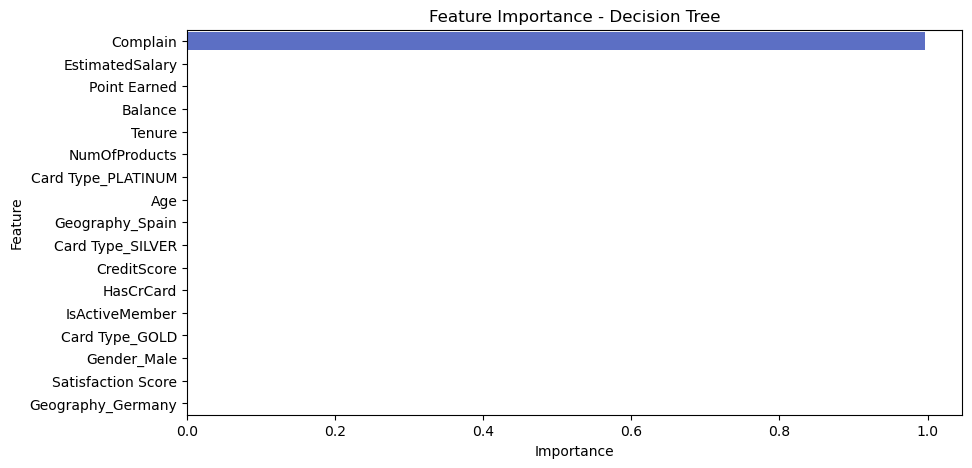

In [223]:


# Extract feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_model.feature_importances_
})

# Sort and reset index
feature_importance = feature_importance.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, hue="Feature", palette="coolwarm", legend=False)
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


